<center>
<h1 style="color:red; font-size:70px;"> Studio delle performance</h1>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from sklearn.metrics import confusion_matrix, top_k_accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-11 17:31:24.462668: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-11 17:31:26.042094: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-11 17:31:27.014733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757604687.995429  330481 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757604688.192428  330481 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757604689.474766  330481 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Confronto iniziale - dropout

In [ ]:
# Importo il validation dataset per provare a confrontare le performance delle due reti
valDir = "../Dataset/test"  
datagen = ImageDataGenerator(rescale=1./255)

valDat = datagen.flow_from_directory(
    valDir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)


img = []
lab = []
conta = 0
for i, l in valDat:
    img.append(i)
    lab.append(l)
    
    conta += 1
    print("Caricato " + str(conta) + " batch")

    if conta >= 200:
        break

# Unisci tutti i batch
img = np.concatenate(img, axis=0)
lab = np.concatenate(lab, axis=0)

Found 7178 images belonging to 7 classes.
Caricato 1 batch
Caricato 2 batch
Caricato 3 batch
Caricato 4 batch
Caricato 5 batch
Caricato 6 batch
Caricato 7 batch
Caricato 8 batch
Caricato 9 batch
Caricato 10 batch
Caricato 11 batch
Caricato 12 batch
Caricato 13 batch
Caricato 14 batch
Caricato 15 batch
Caricato 16 batch
Caricato 17 batch
Caricato 18 batch
Caricato 19 batch
Caricato 20 batch
Caricato 21 batch
Caricato 22 batch
Caricato 23 batch
Caricato 24 batch
Caricato 25 batch
Caricato 26 batch
Caricato 27 batch
Caricato 28 batch
Caricato 29 batch
Caricato 30 batch
Caricato 31 batch
Caricato 32 batch
Caricato 33 batch
Caricato 34 batch
Caricato 35 batch
Caricato 36 batch
Caricato 37 batch
Caricato 38 batch
Caricato 39 batch
Caricato 40 batch
Caricato 41 batch
Caricato 42 batch
Caricato 43 batch
Caricato 44 batch
Caricato 45 batch
Caricato 46 batch
Caricato 47 batch
Caricato 48 batch
Caricato 49 batch
Caricato 50 batch
Caricato 51 batch
Caricato 52 batch
Caricato 53 batch
Caricato 54 b

In [ ]:
# Funzione per capire la posizione della label corretta fra le guess
def ordGuess(img, lab, names):
    appo = np.zeros((2, 7))
    for n, name in enumerate(names):

        # Importo il modello adeguato
        model = load_model(name)  
        print("Inizio studio per: " + name)
        
        conta = 0
        for i, l in zip(img, lab):
            # Effettuo una predizione per ogni immagine possibile
            pred = model.predict(np.expand_dims(i, axis= 0), verbose=0)

            # Capisco dove era messa la guess vera
            rank = np.argsort(-pred[0])  
            ranks = np.empty_like(rank)
            ranks[rank] = np.arange(0, len(pred[0]))

            # Aggiorno la casella corretta
            appo[n , ranks[np.argmax(l)]] += 1
            conta += 1

            if conta % 40 == 0:
                print("     Effettuate " + str(conta) + " guess")

    return appo

names = ["../Modelli/firstTry.keras", "../Modelli/dropoutTry.keras"]
histo = ordGuess(img, lab, names)

Inizio studio per: Modelli/firstTry.keras
     Effettuate 40 guess
     Effettuate 80 guess
     Effettuate 120 guess
     Effettuate 160 guess
     Effettuate 200 guess
     Effettuate 240 guess
     Effettuate 280 guess
     Effettuate 320 guess
     Effettuate 360 guess
     Effettuate 400 guess
     Effettuate 440 guess
     Effettuate 480 guess
     Effettuate 520 guess
     Effettuate 560 guess
     Effettuate 600 guess
     Effettuate 640 guess
     Effettuate 680 guess
     Effettuate 720 guess
     Effettuate 760 guess
     Effettuate 800 guess
     Effettuate 840 guess
     Effettuate 880 guess
     Effettuate 920 guess
     Effettuate 960 guess
     Effettuate 1000 guess
     Effettuate 1040 guess
     Effettuate 1080 guess
     Effettuate 1120 guess
     Effettuate 1160 guess
     Effettuate 1200 guess
     Effettuate 1240 guess
     Effettuate 1280 guess
     Effettuate 1320 guess
     Effettuate 1360 guess
     Effettuate 1400 guess
     Effettuate 1440 guess
     Effettu

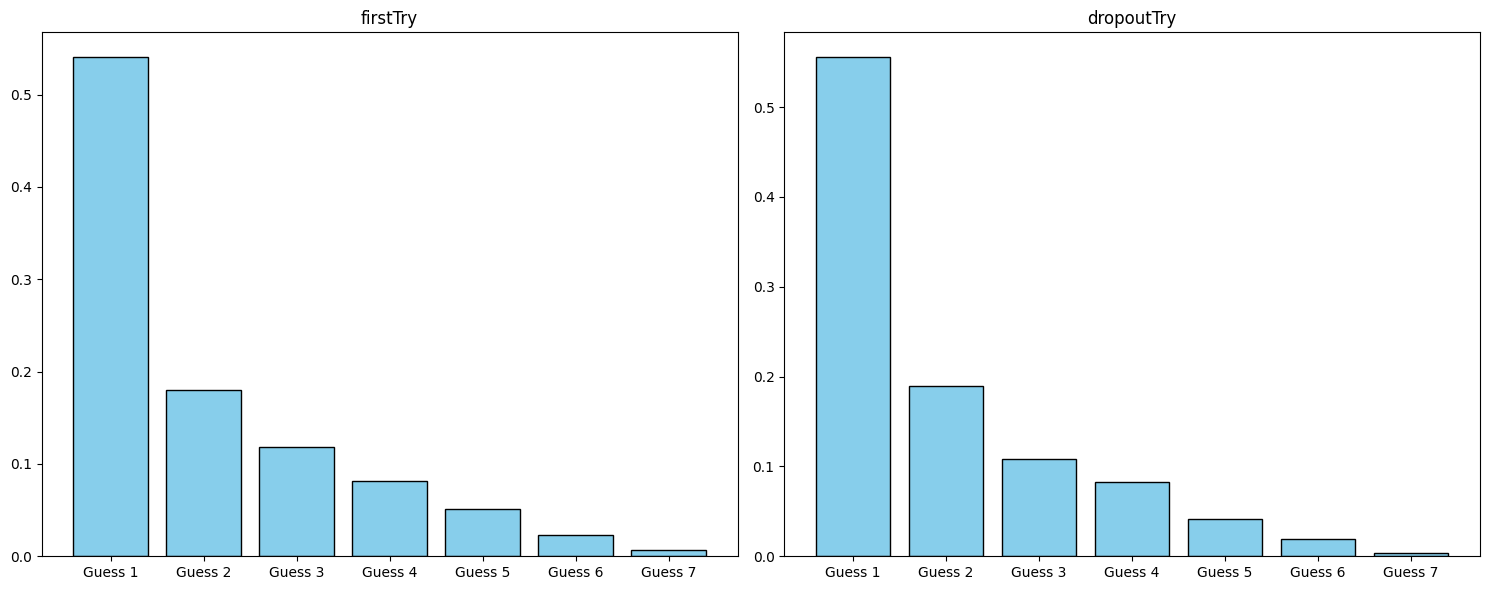

In [12]:
# Funzione per confronto visivo
def histConf(data, names):

    # Creo figura e poi riempio ciclando
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))  
    
    for i, name in enumerate(names):
        appo = data[i][:]
        appo = appo/np.sum(appo)
        ax[i].bar(range(len(appo)), appo, color='skyblue', edgecolor='black')
        ax[i].set_xticks(range(len(appo)), [f'Guess {i+1}' for i in range(len(appo))])
        ax[i].set_title(name.split("/")[-1].split(".")[0])

    plt.tight_layout()
    plt.show()

histConf(histo, names)

## Confusion matrix

In [29]:
# Funzione che consente di stampare la matrice di confusione per un certo modello
def confMat(modN, valDir, titM):

    # Importo il modello e le immagini sulle quali effettuare le guess
    model = load_model(modN)  
    datagen = ImageDataGenerator(rescale=1./255)

    valDat = datagen.flow_from_directory(
        valDir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=64,
        class_mode="categorical",
        shuffle=False
    )

    # Predizioni del modello
    pred = model.predict(valDat)

    # Creazione matrice di confusione
    yTr = valDat.classes
    yPr = np.argmax(pred, axis=1)
    cm = confusion_matrix(yTr, yPr, normalize = 'true')
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix: ' + titM

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Vera label')
    plt.xlabel('Guess label')
    plt.tight_layout()
    plt.show()

Found 7178 images belonging to 7 classes.


/home/filippo/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step


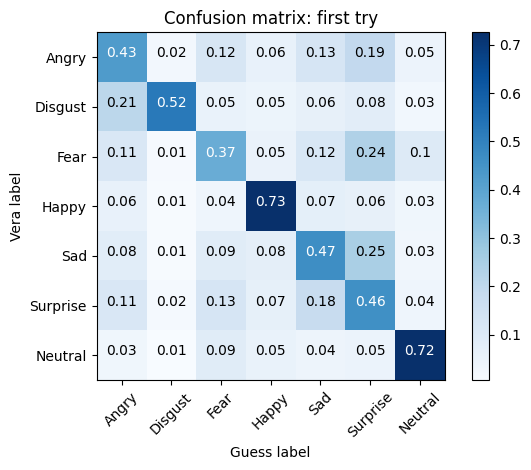

In [ ]:
titM = "first try"
valDir = "../../Dataset/test"  
name = "../../Modelli/firstTry.keras"

confMat(name, valDir, titM)

## Top-k accuracy

[0.54123711 0.72123154 0.83755921 0.91891892 0.97018668 0.99359153]


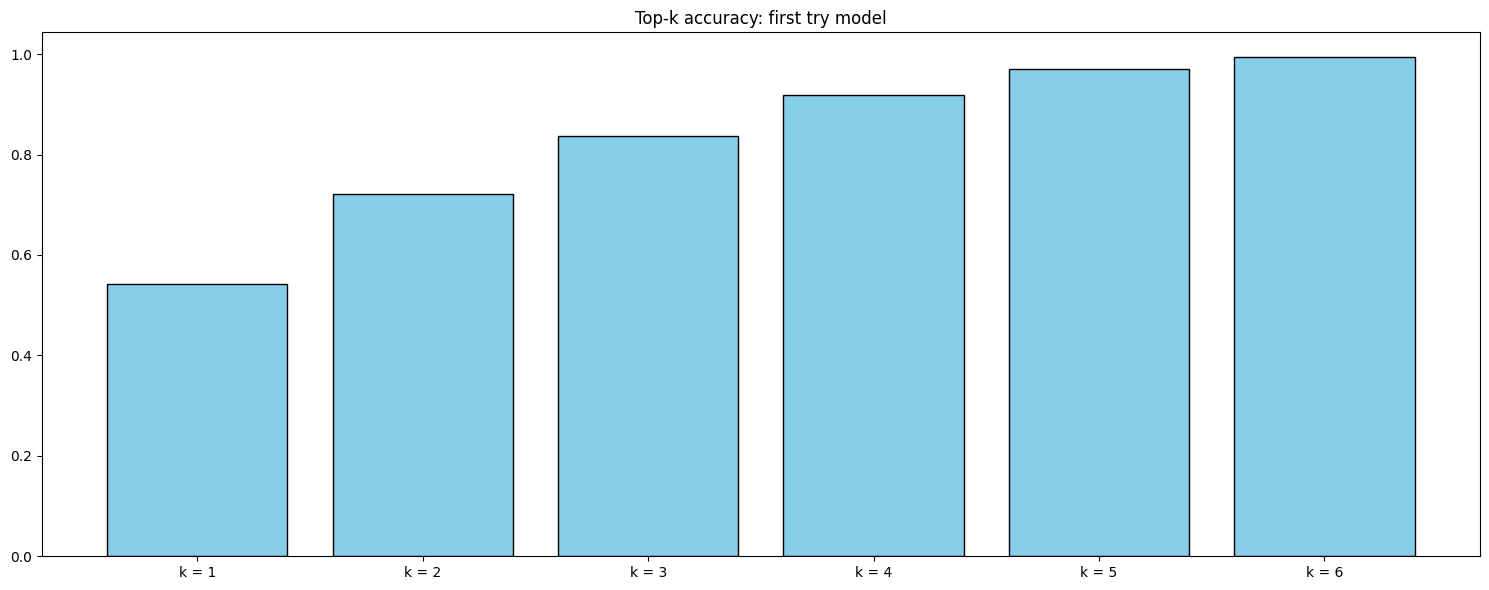

In [ ]:
# Funzione per confronto visivo
def histConf(data, name):

    # Creo figura
    fig = plt.subplots(1, 1, figsize=(15, 6))

    # Creazione istogramma
    plt.bar(range(len(appo)), appo, color='skyblue', edgecolor='black')
    plt.xticks(range(len(appo)), [f'k = {i+1}' for i in range(len(appo))])
    plt.title(name)

    plt.tight_layout()
    plt.show()


# Importo true value e guess
yTr = np.load("guess/trueG.npy")
yPr = np.load("guess/firstTry.npy")

# Ciclo sull'indice k (vado da 1 a 6)
ks = [1, 2, 3, 4, 5, 6]
appo = np.zeros(6)
for i in ks:
    appo[i-1] = top_k_accuracy_score(yTr, yPr, k=i, normalize = True)

histConf(appo, "Top-k accuracy: first try model")

## Capacità di generalizzazione

In [4]:
datagen = ImageDataGenerator(rescale=1./255)
valDat = datagen.flow_from_directory(
    "../Dataset/test",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

labels = valDat.classes
np.save("guess/trueG.npy", labels)

Found 7178 images belonging to 7 classes.
